In [1]:
from HGCal_ImageAlgo3D import *
from utility_benchmark import *
from timeit import default_timer as timer

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

DatasetDir  = '/home/zchen/Documents/ImageAlogrithm3D/data/'
DatasetFile = 'CMSSW93X_pt35_pu000'
#DatasetFile ='CMSSW9304_partGun_PDGid22_x100_E30.0To30.0_NTUP'

Welcome to JupyROOT 6.10/00


In [2]:
df = pd.read_pickle(DatasetDir+"input/"+DatasetFile+"_rechit.pkl")

# 1. Run clustering

In [3]:
ia=ImagingAlgo3D(MAXDISTANCE        = 200,  #cm
                 LAYER_DISTANCE     = 0.16684826,# 1.2,  #cm
                 KERNAL_R           = 2.26653517,#4.0,  #cm
                 KERNAL_R_NORM      = 5.22033166,#2.0,  #cm
                 KERNAL_R_POWER     = 2.0,  #cm
                 KERNAL_LAYER       = 2.0,  #number of layer
                 DECISION_RHO_KAPPA = 10.0, #fractio of max rho
                 DECISION_NHD       = 2.48411659,#4.0,  #cm
                 CONTINUITY_NHD     = 6.0   #cm 
                )
dfresultclus = ia.RunImagingAlgo(df,Nevent=100)
dfresultclus.to_pickle("../data/output/"+DatasetFile+"_OutputClus.pkl")

100%|██████████| 99/99 [00:03<00:00, 31.65it/s]


# 2. Resolution Plots

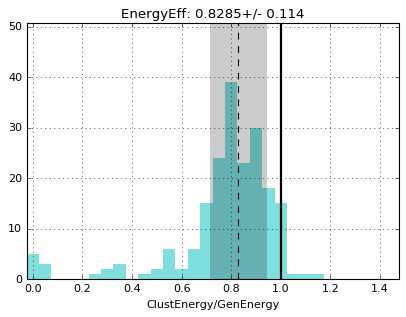

In [5]:
bm = Benchmark('CMSSW93X_pt35_pu000')
#bm = Benchmark('CMSSW9304_partGun_PDGid22_x100_E30.0To30.0_NTUP')
deltarho = 10
mybin = np.arange(-0.025,1.5,0.05)
energyeff = bm.getEnergyEfficiency(deltarho)

sigma,mean= bm.getEffSigma_EnergyEfficiency(deltarho)
result = "EnergyEff: {:6.4}+/-{:6.4}".format(mean,sigma)


h = plt.hist(energyeff,bins=mybin,facecolor='c',histtype="stepfilled",alpha=0.5,lw=0)
ymax = 1.3*h[0].max()
plt.axvline(1,lw=2,c="k")
plt.axvline(mean, lw =1, c="k",linestyle='--')
plt.fill([mean-sigma,mean-sigma,mean+sigma,mean+sigma],
         [0,ymax,ymax,0],lw=0,facecolor='k',alpha=0.2
        )

plt.grid(True)
plt.xlabel("ClustEnergy/GenEnergy")
plt.title(result)
plt.xlim(mybin[0],mybin[-1])
plt.ylim(0,ymax)
plt.savefig("../plot/enegyeff_pi_pu000_opt.png")

In [37]:
a[0].max()

34.0

PU000 EnergyEff: 0.7725+/-0.1287
PU200 EnergyEff: 0.9496+/- 0.269


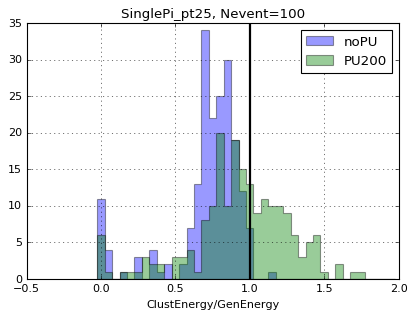

In [25]:
from utility_benchmark import *
bm000 = Benchmark('CMSSW93X_pt35_pu000', N=100)
bm200 = Benchmark('CMSSW93X_pt35_pu200', N=100)

deltarho = 5
energyeff000 = bm000.getEnergyEfficiency(deltarho)
energyeff200 = bm200.getEnergyEfficiency(deltarho)
    
plt.hist(energyeff000,bins=np.arange(0-0.025,2.0,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="noPU")
plt.hist(energyeff200,bins=np.arange(0-0.025,2.0,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="PU200")
plt.axvline(1,lw=2,c="k")
plt.grid(True)
plt.legend()
plt.xlabel("ClustEnergy/GenEnergy")
plt.title("SinglePi_pt25, Nevent=100")
plt.savefig("../plot/pu200.png")


sigma000,mean000 = bm000.getEffSigma_EnergyEfficiency(deltarho)
sigma200,mean200 = bm200.getEffSigma_EnergyEfficiency(deltarho)
print("PU000 EnergyEff: {:6.4}+/-{:6.4}".format(mean000,sigma000))
print("PU200 EnergyEff: {:6.4}+/-{:6.4}".format(mean200,sigma200))